In [37]:
import os
import glob
os.getcwd()
assert os.getcwd().split("/")[-1] == 'notebooks'
from skimage.io import imread, imsave
from defects_dlmbl import segment_affinities as seg
import numpy as np
import matplotlib.pyplot as plt

In [25]:
image_folder = '../experiments/images/'
affinity_list = sorted(glob.glob(image_folder+"*_affinity.tif"), key=lambda fn: int(fn.split("/")[-1].split('_')[0]))

In [45]:
print(affinity_list[0].split('_')[0])

../experiments/images/0


In [49]:
segmentations = []
for item in affinity_list:
    affinity = imread(item)
    assert len(affinity.shape) == 3
    assert affinity.shape[0] == 2 # only works for this
    affs = np.stack([np.zeros_like(affinity[0]),
            affinity[0],
            affinity[1]])
    affs = np.expand_dims(affs, axis=1)
    segmentation = segmentation = seg.watershed_from_affinities(affs, threshold=0.95)
    segmentation = segmentation.astype('int16')
    imsave(item.split('_')[0]+"_segmentation.tif", segmentation)
    segmentations.append(segmentation)


    

/tmp/ipykernel_28057/2524721927.py:12: UserWarning: ../experiments/images/0_segmentation.tif is a low contrast image
  imsave(item.split('_')[0]+"_segmentation.tif", segmentation)
/tmp/ipykernel_28057/2524721927.py:12: UserWarning: ../experiments/images/1000_segmentation.tif is a low contrast image
  imsave(item.split('_')[0]+"_segmentation.tif", segmentation)
/tmp/ipykernel_28057/2524721927.py:12: UserWarning: ../experiments/images/2000_segmentation.tif is a low contrast image
  imsave(item.split('_')[0]+"_segmentation.tif", segmentation)
/tmp/ipykernel_28057/2524721927.py:12: UserWarning: ../experiments/images/3000_segmentation.tif is a low contrast image
  imsave(item.split('_')[0]+"_segmentation.tif", segmentation)
/tmp/ipykernel_28057/2524721927.py:12: UserWarning: ../experiments/images/4000_segmentation.tif is a low contrast image
  imsave(item.split('_')[0]+"_segmentation.tif", segmentation)
/tmp/ipykernel_28057/2524721927.py:12: UserWarning: ../experiments/images/5000_segmentat

/tmp/ipykernel_28057/2524721927.py:12: UserWarning: ../experiments/images/46000_segmentation.tif is a low contrast image
  imsave(item.split('_')[0]+"_segmentation.tif", segmentation)
/tmp/ipykernel_28057/2524721927.py:12: UserWarning: ../experiments/images/47000_segmentation.tif is a low contrast image
  imsave(item.split('_')[0]+"_segmentation.tif", segmentation)
/tmp/ipykernel_28057/2524721927.py:12: UserWarning: ../experiments/images/48000_segmentation.tif is a low contrast image
  imsave(item.split('_')[0]+"_segmentation.tif", segmentation)
/tmp/ipykernel_28057/2524721927.py:12: UserWarning: ../experiments/images/49000_segmentation.tif is a low contrast image
  imsave(item.split('_')[0]+"_segmentation.tif", segmentation)
/tmp/ipykernel_28057/2524721927.py:12: UserWarning: ../experiments/images/50000_segmentation.tif is a low contrast image
  imsave(item.split('_')[0]+"_segmentation.tif", segmentation)
/tmp/ipykernel_28057/2524721927.py:12: UserWarning: ../experiments/images/51000_

/tmp/ipykernel_28057/2524721927.py:12: UserWarning: ../experiments/images/94000_segmentation.tif is a low contrast image
  imsave(item.split('_')[0]+"_segmentation.tif", segmentation)
/tmp/ipykernel_28057/2524721927.py:12: UserWarning: ../experiments/images/95000_segmentation.tif is a low contrast image
  imsave(item.split('_')[0]+"_segmentation.tif", segmentation)
/tmp/ipykernel_28057/2524721927.py:12: UserWarning: ../experiments/images/96000_segmentation.tif is a low contrast image
  imsave(item.split('_')[0]+"_segmentation.tif", segmentation)
/tmp/ipykernel_28057/2524721927.py:12: UserWarning: ../experiments/images/97000_segmentation.tif is a low contrast image
  imsave(item.split('_')[0]+"_segmentation.tif", segmentation)
/tmp/ipykernel_28057/2524721927.py:12: UserWarning: ../experiments/images/98000_segmentation.tif is a low contrast image
  imsave(item.split('_')[0]+"_segmentation.tif", segmentation)


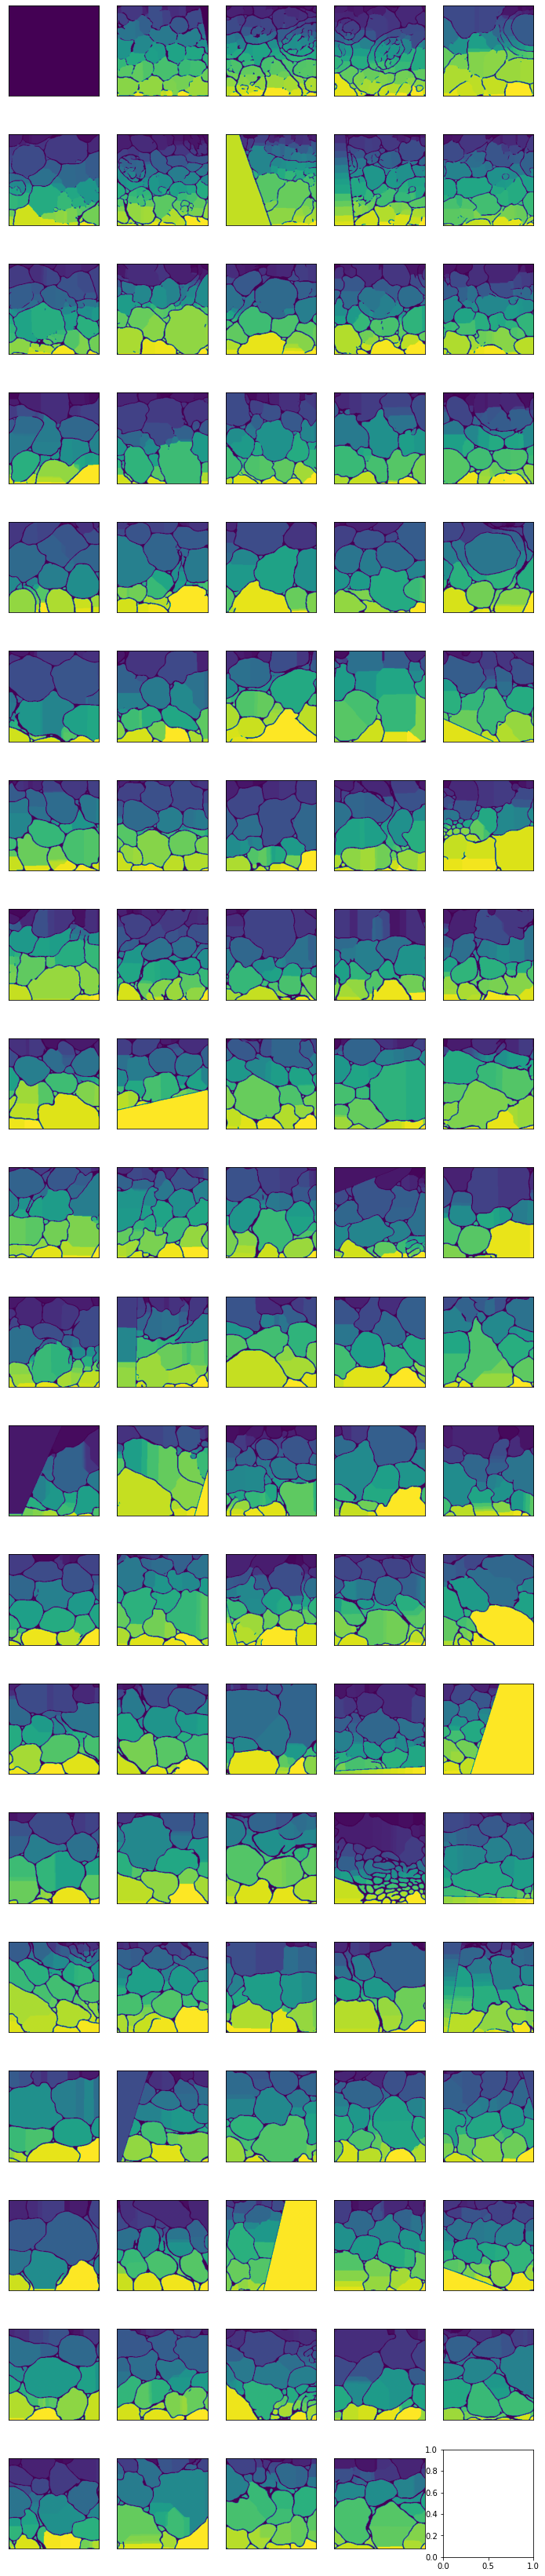

In [48]:
n_col = 5 
n_row = 20
_, axs = plt.subplots(n_row, n_col, figsize=(12, 60))
axs = axs.flatten()[:len(segmentations)]
for img, ax in zip(segmentations, axs):
    ax.imshow(img[0,...])
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)


plt.show()